In [1]:
import os
os.chdir("/Users/John/Downloads")

In [4]:
import pandas as pd
marketing = pd.read_csv('marketing.csv')

In [5]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [6]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [7]:
print(marketing['converted'].dtype)

object


In [8]:
# Change the data type of a column
marketing['converted'] = marketing['converted'].astype('bool')
print(marketing['converted'].dtype)

bool


In [9]:
marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads', True, False)
print(marketing.is_house_ads.head(3))

0    True
1    True
2    True
Name: is_house_ads, dtype: bool


In [10]:
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)
print(marketing['channel_code'].head(3))

0    1.0
1    1.0
2    1.0
Name: channel_code, dtype: float64


In [11]:
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [12]:
# Aggregate unique users that see ads by date
daily_users = marketing.groupby(['date_served'])\
['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


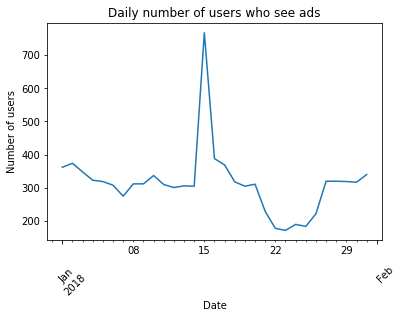

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot
daily_users.plot()
# Annotate
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

Conversion rate = Total number of people we marketed to / Number of people who convert

In [14]:
# Calculating conversion rate
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()
conv_rate = subscribers / total

print(round(conv_rate*100, 2), '%')

13.89 %


Retention rate = Total number of people who converted / Number of people who remain subscribed

In [15]:
# Calculating retention rate
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
retention = retained / subscribers

print(round(retention*100, 2), '%')

66.8 %


In [16]:
# Subset to include only House Ads (Segmentation)
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()
retention_rate = retained / subscribers

print(round(retention_rate*100,2), '%')

58.05 %


In [17]:
# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()

print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [18]:
# Group by subscribing_channel and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()

print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [19]:
# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained / subscribers)*100

print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


* Comparing language conversion rates

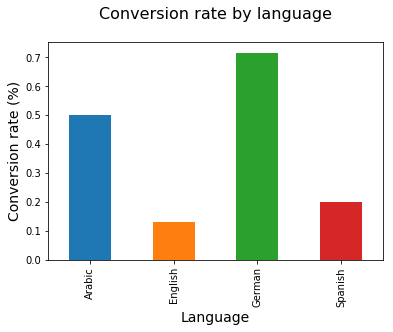

In [20]:
import matplotlib.pyplot as plt

total = marketing.groupby(['language_displayed'])['user_id'].nunique()
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()
language_conversion_rate = subscribers / total

# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

* Calculating subscriber quality

In [21]:
# Group by language_displayed and count unique users
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()

# Group by language_displayed and sum conversions
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()

# Calculate subscriber quality across dates
daily_retention_rate = retained / total

In [22]:
# Reset index to turn the Series into a DataFrame
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())

# Rename columns
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

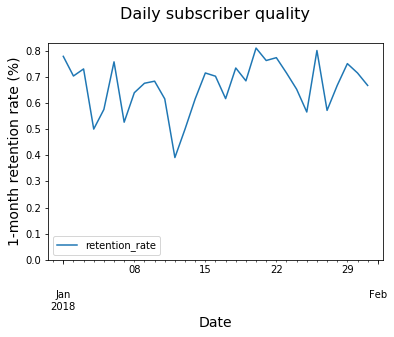

In [23]:
# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot('date_subscribed', 'retention_rate')

# Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

* Calculating daily conversion rate

In [24]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers / total

In [25]:
# Reset index to turn the Series into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

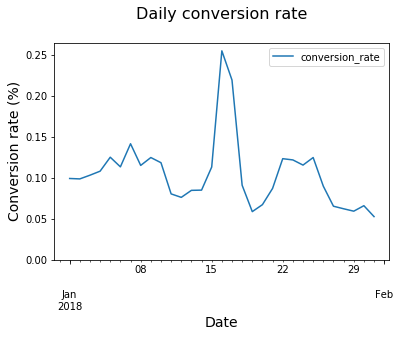

In [25]:
# Create a line chart using the daily_conversion DataFrame
daily_conversion_rate.plot('date_served', 'conversion_rate')

# Add a title and x and y-axis labels
plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

In [26]:
language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [27]:
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


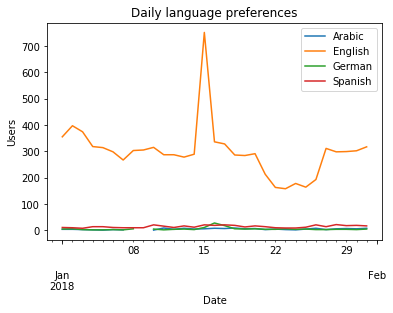

In [28]:
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = language.columns.values)
plt.show()

In [29]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred', 'age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


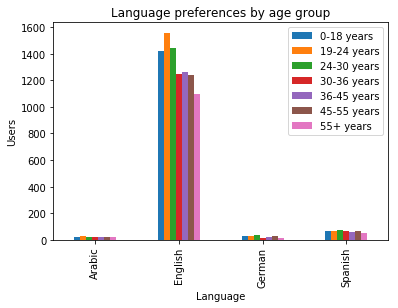

In [30]:
language_age.plot(kind = 'bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = language_age.columns.values)
plt.show()

In [31]:
# Count the subs by referring channel and day
retention_total = marketing.groupby(['date_subscribed'
,
'subscribing_channel'])\
['user_id'].nunique()
retention_subs = marketing[marketing['is_retained'] == True]\
.groupby(['date_subscribed'
,
'subscribing_channel'])\
['user_id'].nunique()
# Calculate the retention rate
daily_retention_rate = retention_subs/retention_total
daily_retention_rate = pd.DataFrame(
daily_retention_rate.unstack(level=1)
)

In [32]:
print(daily_retention_rate)

subscribing_channel     Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                        
2018-01-01           1.000000  0.875000   0.687500   0.750000  1.000000
2018-01-02           0.750000  1.000000   0.588235   0.625000  1.000000
2018-01-03                NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04           0.500000  0.666667   0.466667   0.500000       NaN
2018-01-05           1.000000  0.571429   0.500000   0.636364  1.000000
2018-01-06           0.800000  0.571429   0.941176   0.500000  0.500000
2018-01-07           0.500000  0.750000   0.526316   0.400000  0.666667
2018-01-08                NaN  0.888889   0.500000   0.625000  1.000000
2018-01-09           0.500000  0.285714   0.850000   0.666667  0.500000
2018-01-10           1.000000  0.714286   0.666667   0.555556  1.000000
2018-01-11           0.333333  0.571429   0.166667   1.000000  1.000000
2018-01-12                NaN  0.571429        NaN   0.500000  0

In [33]:
def retention_rate(dataframe, column_names):
# Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
# Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate

In [34]:
daily_retention = retention_rate(marketing,
['date_subscribed',
'subscribing_channel'])
daily_retention = pd.DataFrame(
daily_retention.unstack(level=1)
)
print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


date_subscribed  age_group  
2018-01-01       0-18 years     0.888889
                 19-24 years    0.833333
                 24-30 years    1.333333
                 30-36 years    1.333333
                 36-45 years    3.000000
                 45-55 years    2.000000
                 55+ years      0.750000
2018-01-02       0-18 years     0.727273
                 19-24 years    0.750000
                 24-30 years    0.571429
                 30-36 years    3.000000
                 36-45 years    1.333333
                 45-55 years    3.000000
                 55+ years      1.000000
2018-01-03       0-18 years     1.200000
                 19-24 years    0.785714
                 24-30 years    0.750000
                 30-36 years    1.500000
                 36-45 years    2.333333
                 45-55 years    1.333333
                 55+ years      1.000000
2018-01-04       0-18 years     0.666667
                 19-24 years    0.600000
                 24-30 years

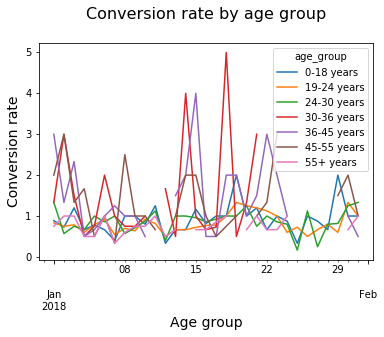

In [49]:
# Calculate conversion rate by age_group
age_group_retention = retention_rate(marketing, ['date_subscribed', 'age_group'])
print(age_group_retention)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_retention.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

date_subscribed  subscribing_channel
2018-01-01       Email                  1.000000
                 Facebook               0.875000
                 House Ads              0.687500
                 Instagram              0.750000
                 Push                   1.000000
2018-01-02       Email                  0.750000
                 Facebook               1.000000
                 House Ads              0.588235
                 Instagram              0.625000
                 Push                   1.000000
2018-01-03       Email                       NaN
                 Facebook               0.800000
                 House Ads              0.647059
                 Instagram              0.909091
                 Push                   0.666667
2018-01-04       Email                  1.000000
                 Facebook               0.666667
                 House Ads              0.466667
                 Instagram              0.500000
                 Push           

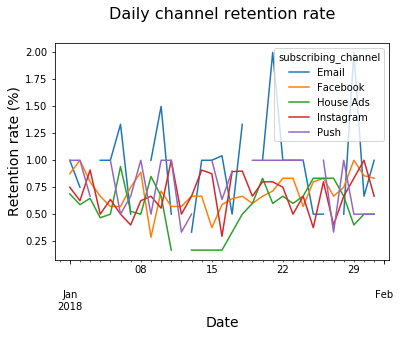

In [35]:
# Calculate conversion rate by age_group
daily_retention = retention_rate(marketing, ['date_subscribed', 'subscribing_channel'])
print(daily_retention)

# Unstack and create a DataFrame
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))

# Visualize conversion by age_group
daily_retention.plot()
plt.title('Daily channel retention rate\n'
, size = 16)
plt.ylabel('Retention rate (%)'
, size = 14)
plt.xlabel('Date'
, size = 14)
plt.show()

In [37]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
             45-55 years    0.022222
             55+ years      0.086957
2018-01-02   0-18 years     0.180328
             19-24 years    0.164384
             24-30 years    0.114754
             30-36 years    0.040000
             36-45 years    0.043478
             45-55 years    0.043478
             55+ years      0.024390
2018-01-03   0-18 years     0.102041
             19-24 years    0.208955
             24-30 years    0.150943
             30-36 years    0.042553
             36-45 years    0.060000
             45-55 years    0.047619
             55+ years      0.043478
2018-01-04   0-18 years     0.117647
             19-24 years    0.200000
             24-30 years    0.183673
             30-36 years    0.045455
             36-45 years    0.043478
             

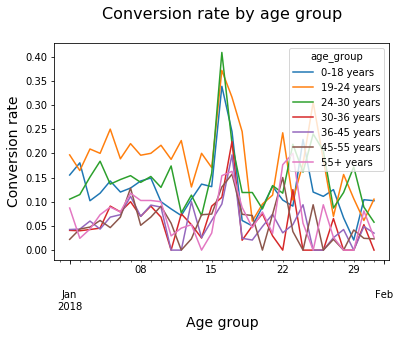

In [39]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [42]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show() 
        plt.clf()

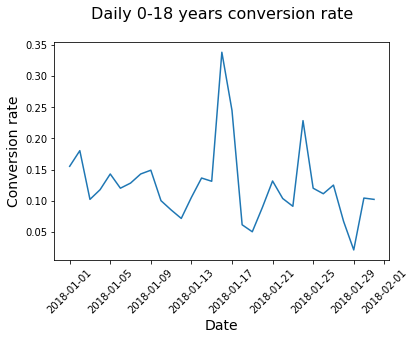

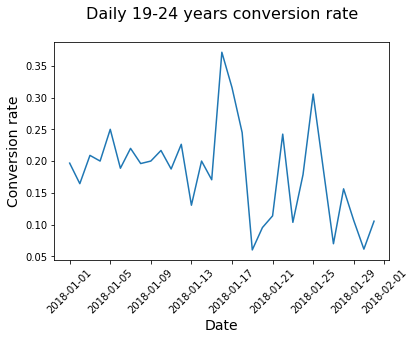

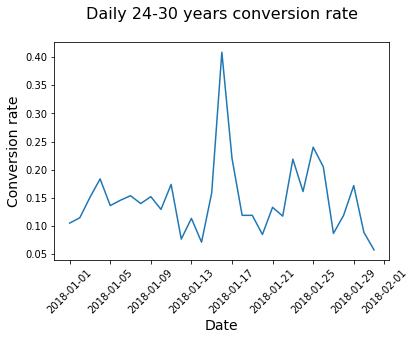

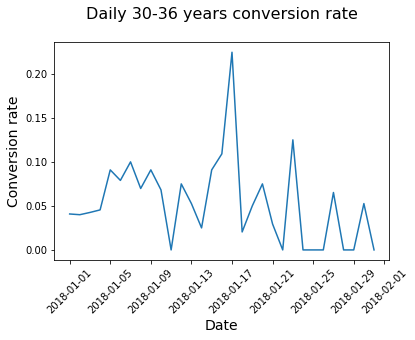

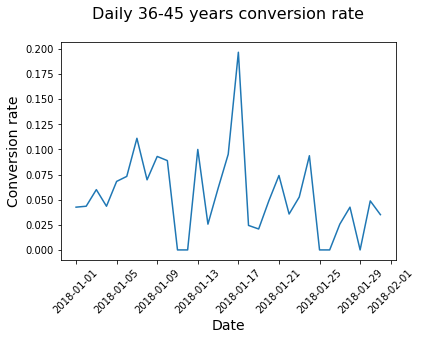

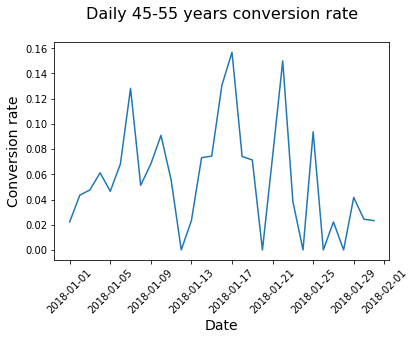

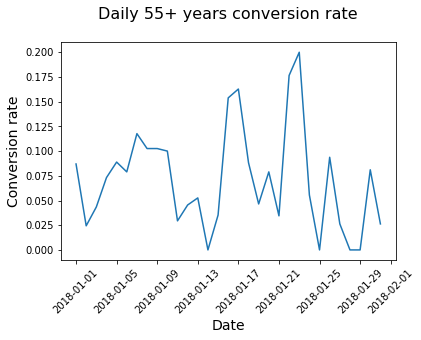

<Figure size 432x288 with 0 Axes>

In [43]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

In [44]:
age_group_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889
2018-01-06,0.120000,0.188679,0.145833,0.078947,0.073171,0.068182,0.078947
2018-01-07,0.128205,0.220000,0.153846,0.100000,0.111111,0.128205,0.117647
2018-01-08,0.142857,0.196078,0.140000,0.069767,0.069767,0.051282,0.102564
2018-01-09,0.148936,0.200000,0.152174,0.090909,0.093023,0.068182,0.102564


date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
2018-01-02   Email                1.000000
             Facebook             0.098361
             House Ads            0.077982
             Instagram            0.129032
             Push                 0.055556
2018-01-03   Email                0.000000
             Facebook             0.080645
             House Ads            0.088542
             Instagram            0.171875
             Push                 0.083333
2018-01-04   Email                0.500000
             Facebook             0.138462
             House Ads            0.089820
             Instagram            0.126984
             Push                 0.058824
2018-01-05   Email                1.000000
             Facebook             0.112903
             House Ads 

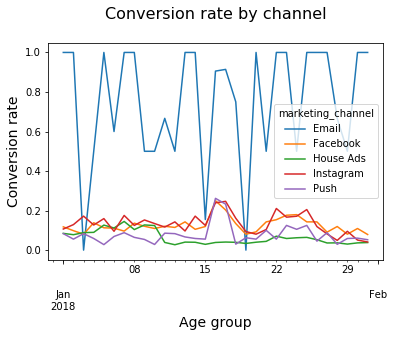

In [54]:
# Calculate conversion rate by age_group
channel_group_conv = conversion_rate(marketing, ['date_served', 'marketing_channel'])
print(channel_group_conv)

# Unstack and create a DataFrame
channel_group_df = pd.DataFrame(channel_group_conv.unstack(level=1))

# Visualize conversion by age_group
channel_group_df.plot()
plt.title('Conversion rate by channel\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

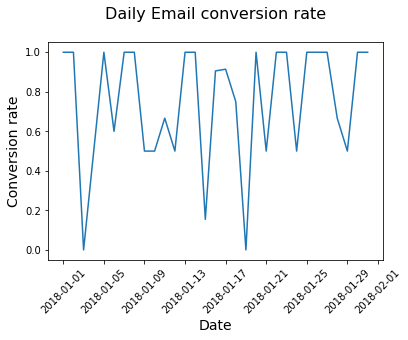

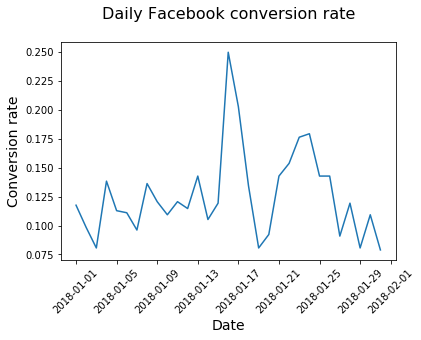

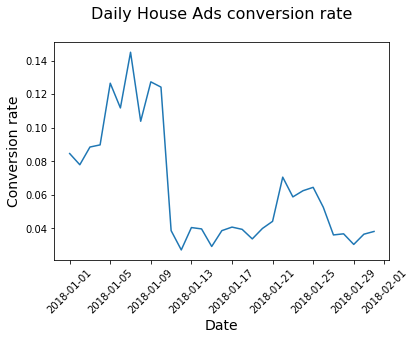

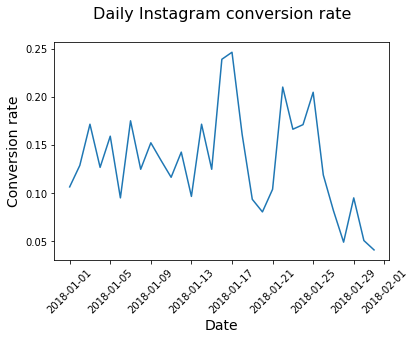

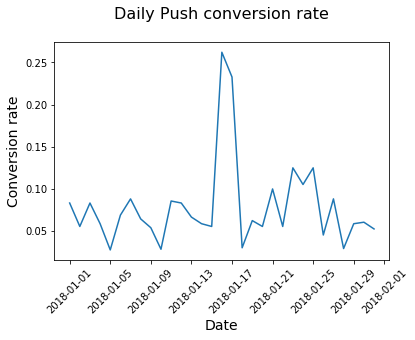

<Figure size 432x288 with 0 Axes>

In [45]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level=1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

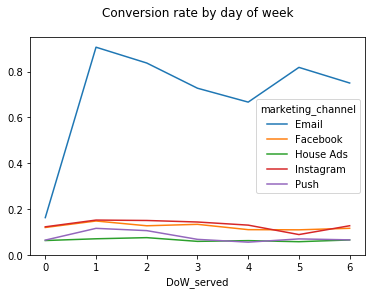

In [47]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

date_served  language_displayed
2018-01-01   Arabic                1.000000
             English               0.092754
             German                0.200000
             Spanish               0.000000
2018-01-02   Arabic                0.000000
             English               0.094708
             German                0.600000
             Spanish               0.000000
2018-01-03   Arabic                0.000000
             English               0.101493
             German                0.333333
             Spanish               0.125000
2018-01-04   Arabic                0.000000
             English               0.104918
             German                0.000000
             Spanish               0.214286
2018-01-05   Arabic                1.000000
             English               0.118812
             German                0.000000
             Spanish               0.214286
2018-01-06   Arabic                1.000000
             English               0.102740


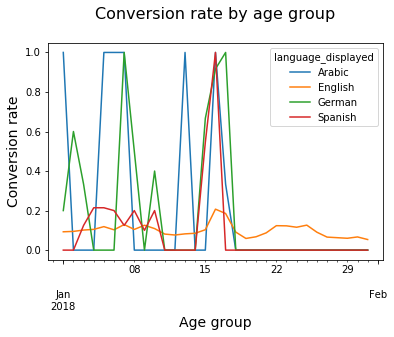

In [51]:
# Calculate conversion rate by language
language_group_conv = conversion_rate(marketing, ['date_served', 'language_displayed'])
print(language_group_conv)

# Unstack and create a DataFrame
language_group_df = pd.DataFrame(language_group_conv.unstack(level=1))
language_group_df = language_group_df.fillna(0)

# Visualize conversion by age_group
language_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

date_served  language_displayed
2018-01-01   Arabic                1.000000
             English               0.075145
             German                0.200000
             Spanish               0.000000
2018-01-02   Arabic                0.000000
             English               0.068966
             German                0.600000
             Spanish               0.000000
2018-01-03   Arabic                0.000000
             English               0.083799
             German                0.333333
             Spanish               0.125000
2018-01-04   Arabic                0.000000
             English               0.080537
             German                0.000000
             Spanish               0.214286
2018-01-05   English               0.118881
             German                0.000000
             Spanish               0.214286
2018-01-06   Arabic                1.000000
             English               0.087591
             German                0.000000


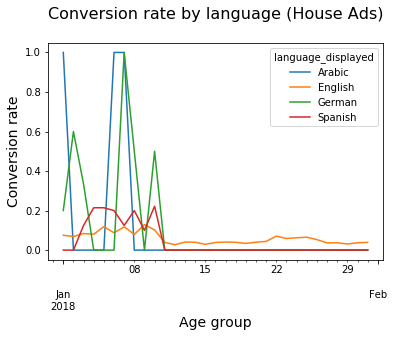

In [55]:
# Calculate conversion rate by language
marketing_house_ads = marketing[marketing['marketing_channel'] == 'House Ads']
language_group_conv = conversion_rate(marketing_house_ads, ['date_served', 'language_displayed'])
print(language_group_conv)

# Unstack and create a DataFrame
language_group_df = pd.DataFrame(language_group_conv.unstack(level=1))
language_group_df = language_group_df.fillna(0)

# Visualize conversion by age_group
language_group_df.plot()
plt.title('Conversion rate by language (House Ads)\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

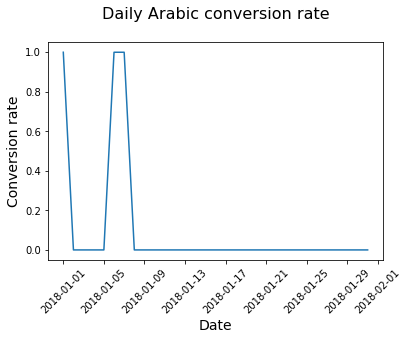

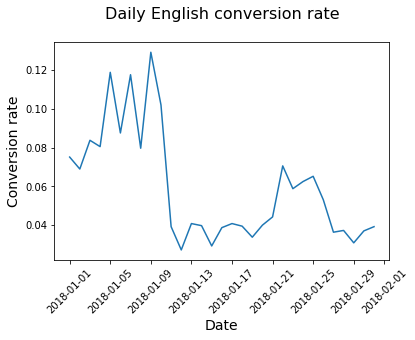

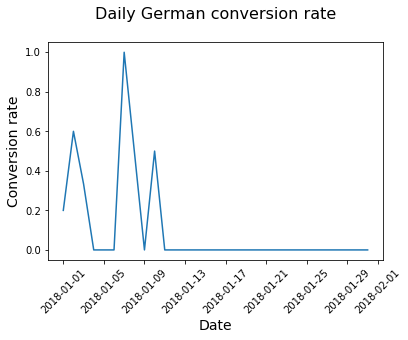

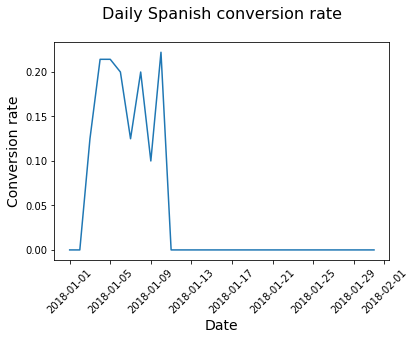

<Figure size 432x288 with 0 Axes>

In [52]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))
conv_lang_df = conv_lang_df.fillna(0)

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In [56]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


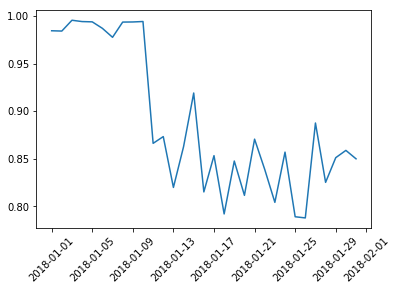

In [58]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()

In [59]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish'] / lang_conv['English']
arabic_index = lang_conv['Arabic'] / lang_conv['English']
german_index = lang_conv['German'] / lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Now that you've created indexes for each language compared with English, you can assess what conversion rate should have been during the rest of the month.

In [60]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

In [64]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate'] * converted_df[('user_id','Spanish')] / 100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate'] * converted_df[('user_id','Arabic')] / 100
converted_df['expected_german_conv'] = converted_df['expected_german_rate'] * converted_df[('user_id','German')] / 100

In [65]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


In [62]:
converted.head()

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0

In [63]:
converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

* AB Testing

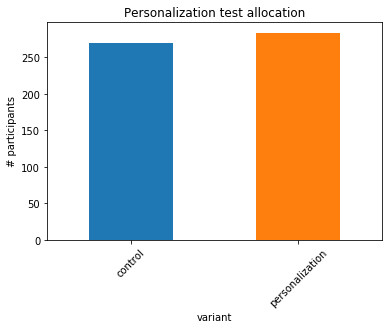

In [67]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.xticks(rotation = 45)
plt.show()

In [68]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


lift = (Treatment conversion rate - Control conversion rate) / Control conversion rate

In [69]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [76]:
from scipy.stats import ttest_ind

def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization)) 
      print('t-statistic:', ttest_ind(control, personalization), '\n\n')

In [77]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [78]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 


